In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_raw = pd.read_csv('../data/train.csv')
test_raw = pd.read_csv('../data/test.csv')
meal_info = pd.read_csv('../data/meal_info.csv')
center_info = pd.read_csv('../data/fulfilment_center_info.csv')

In [5]:
data = pd.merge(train_raw,meal_info,on='meal_id',how='left')
df = pd.merge(data,center_info,on='center_id',how='left')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [6]:
df.shape

(456548, 15)

In [7]:
df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [9]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [13]:
df.select_dtypes(include=['number']).quantile([0,0.25,0.5,0.75,1]).T

,0.00,0.25,0.50,0.75,1.00
id,1000000.00,1124998.75,1250183.50,1375140.25,1499999.00
week,1.00,39.00,76.00,111.00,145.00
center_id,10.00,43.00,76.00,110.00,186.00
meal_id,1062.00,1558.00,1993.00,2539.00,2956.00
checkout_price,2.97,228.95,296.82,445.23,866.27
base_price,55.35,243.50,310.46,458.87,866.27
emailer_for_promotion,0.00,0.00,0.00,0.00,1.00
homepage_featured,0.00,0.00,0.00,0.00,1.00
num_orders,13.00,54.00,136.00,324.00,24299.00
city_code,456.00,553.00,596.00,651.00,713.00


In [ ]:
def grab_col_names(df, cat_thresh = 10, cat_car_thresh = 20):
    '''
    Parameters:
        df: dataframe
        cat_thresh: threshold for segregating categorical variable
        cat_car_thresh: threshold for segregating categorical but cardinal variable
    
    Returns:
        cat_col: categorical columns having discrete values.
        num_col: numerical columns
        cat_but_car: columns that appear categorical but have too many unique values (high cardinality)
    '''

    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_thresh and df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > cat_car_thresh and df[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car


In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

print("Categorical columns: ")
print(cat_cols)
print()
print("Numerical Columns: ")
print(num_cols)
print()
print("Categorical Columns with high cardinality")
print(cat_but_car)


Categorical columns: 
['category', 'cuisine', 'center_type', 'emailer_for_promotion', 'homepage_featured', 'region_code']

Numerical Columns: 
['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'num_orders', 'city_code', 'op_area']

Categorical Columns with high cardinality
[]


In [29]:
df['category'].value_counts().values
# df['category']

array([127890,  33408,  33291,  33138,  29941,  29379,  29294,  28559,
        27694,  26916,  20614,  13562,  12675,  10187])

In [107]:
# Categorical variable summary
def cat_summary(df,col_name,plot=False):
    dataframe = pd.DataFrame({
        col_name: df[col_name].value_counts().index,
        "Ratio": 100*df[col_name].value_counts().values/len(df)
    })

    print(dataframe)
    print()
    
    if plot:
        plt.figure(figsize=(15,12))
        sns.countplot(x=df[col_name], data=df)
        # plt.tight_layout()
        plt.show()
        
    

        category      Ratio
0      Beverages  28.012389
1      Rice Bowl   7.317522
2       Sandwich   7.291895
3          Pizza   7.258382
4       Starters   6.558128
5   Other Snacks   6.435030
6         Desert   6.416412
7          Salad   6.255421
8          Pasta   6.065956
9        Seafood   5.895547
10       Biryani   4.515188
11        Extras   2.970553
12          Soup   2.776269
13          Fish   2.231310



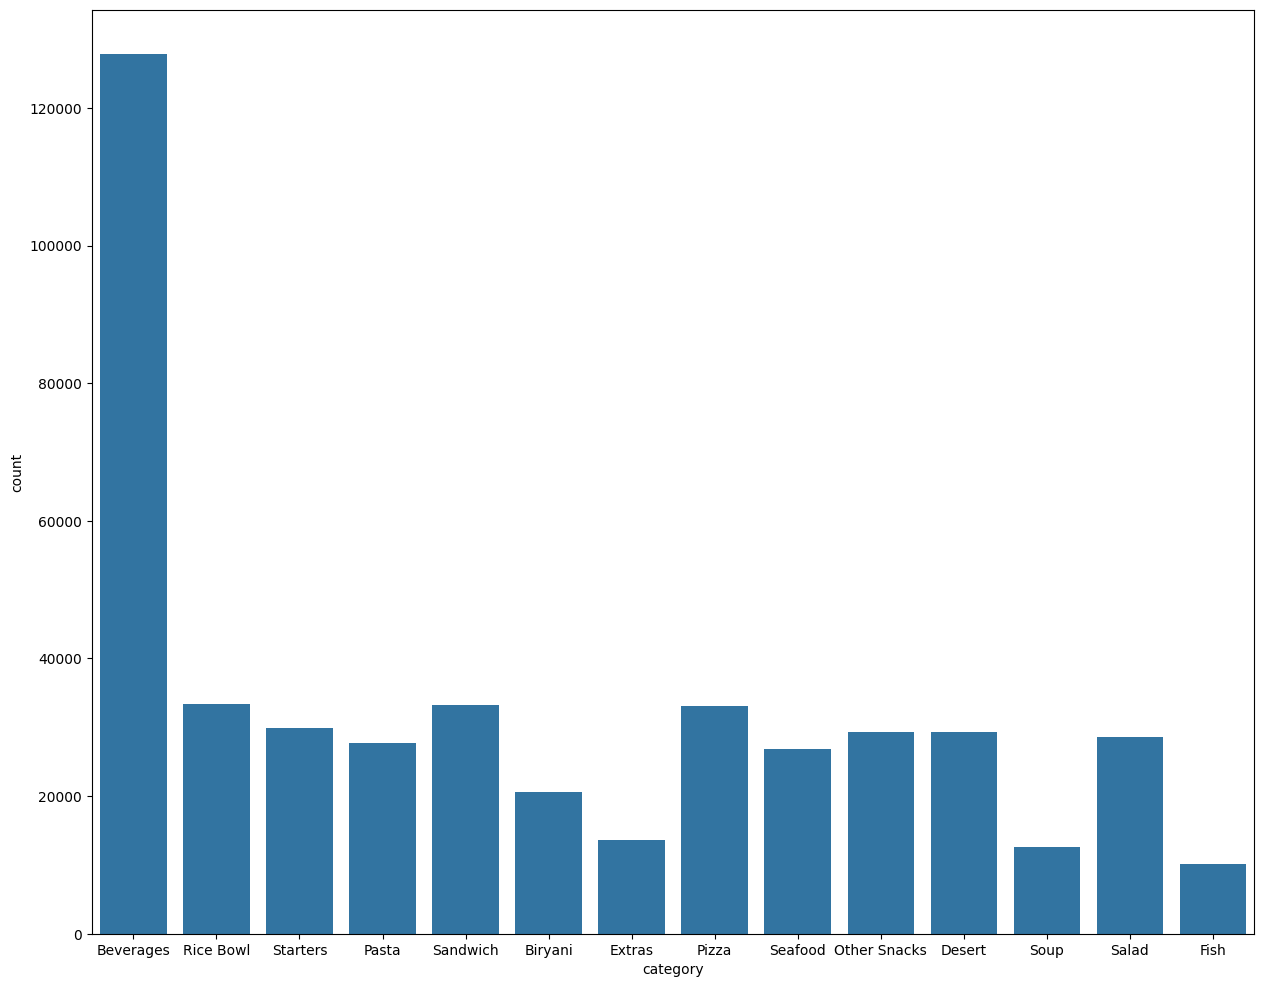

       cuisine      Ratio
0      Italian  26.924880
1         Thai  25.893444
2       Indian  24.665972
3  Continental  22.515705



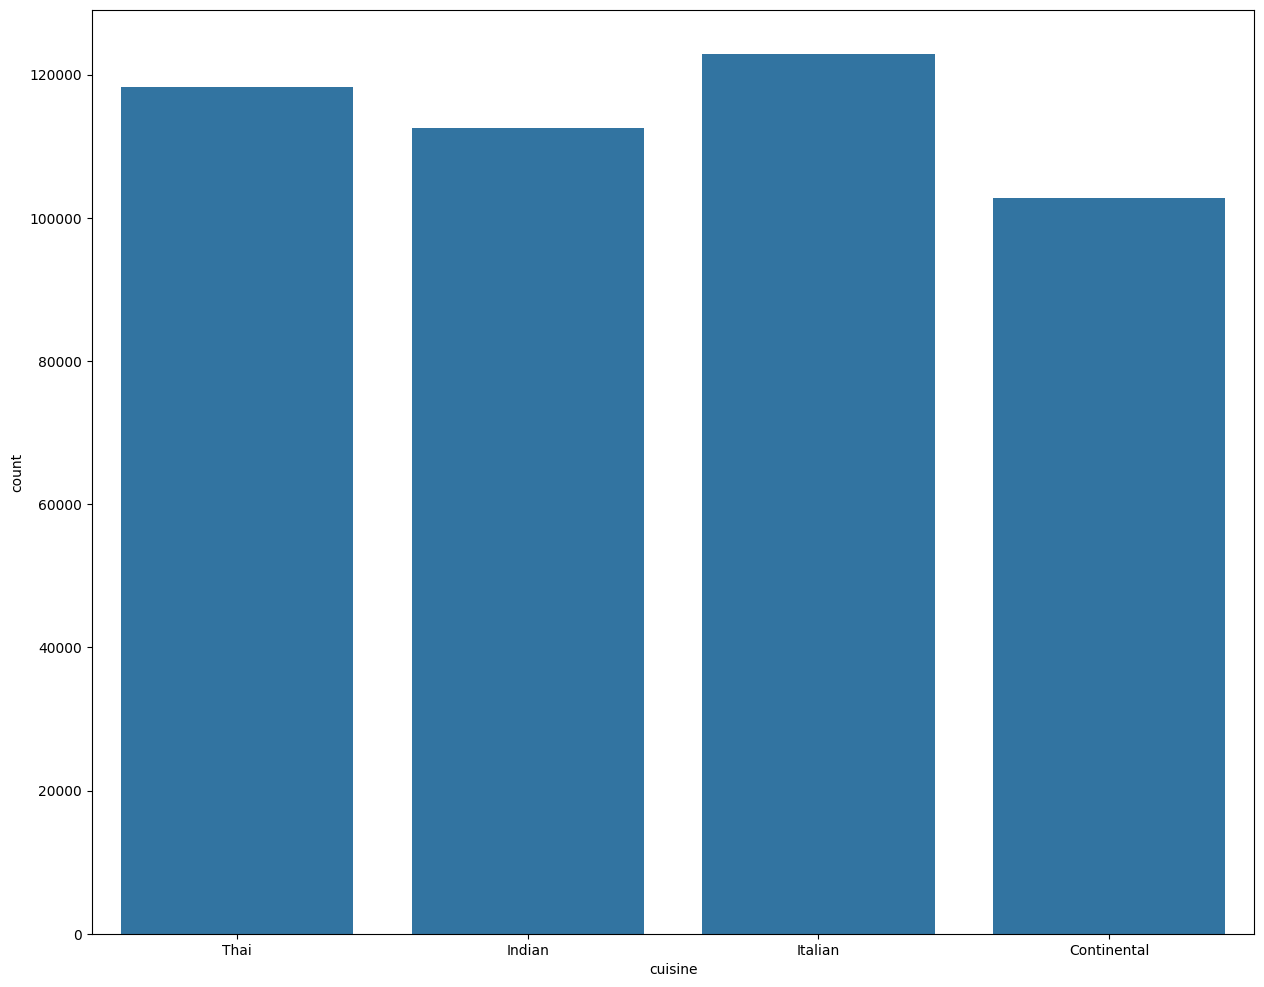

  center_type      Ratio
0      TYPE_A  57.580145
1      TYPE_C  21.814355
2      TYPE_B  20.605500



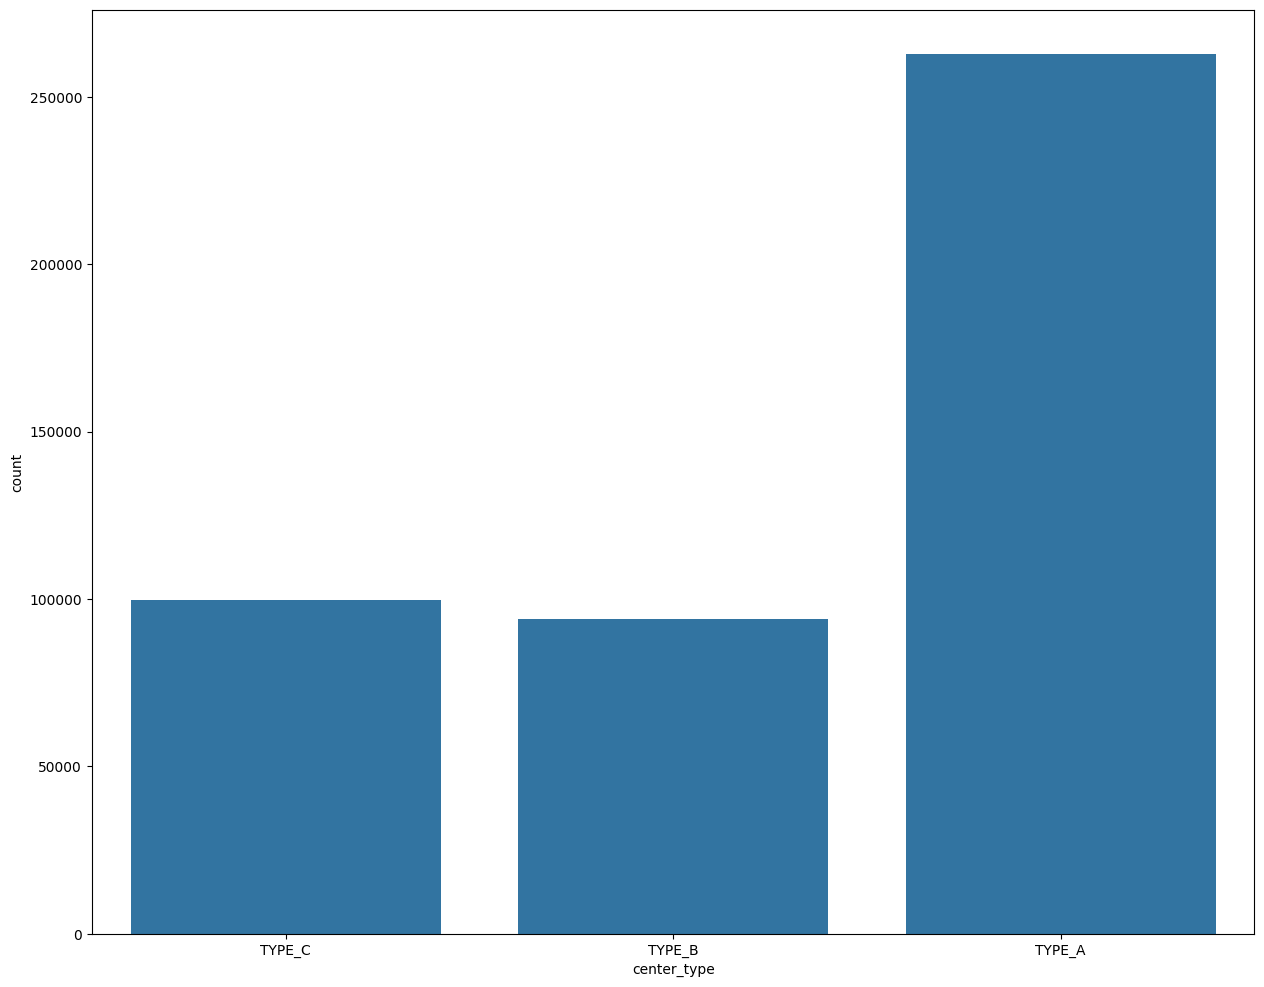

   emailer_for_promotion      Ratio
0                      0  91.884753
1                      1   8.115247



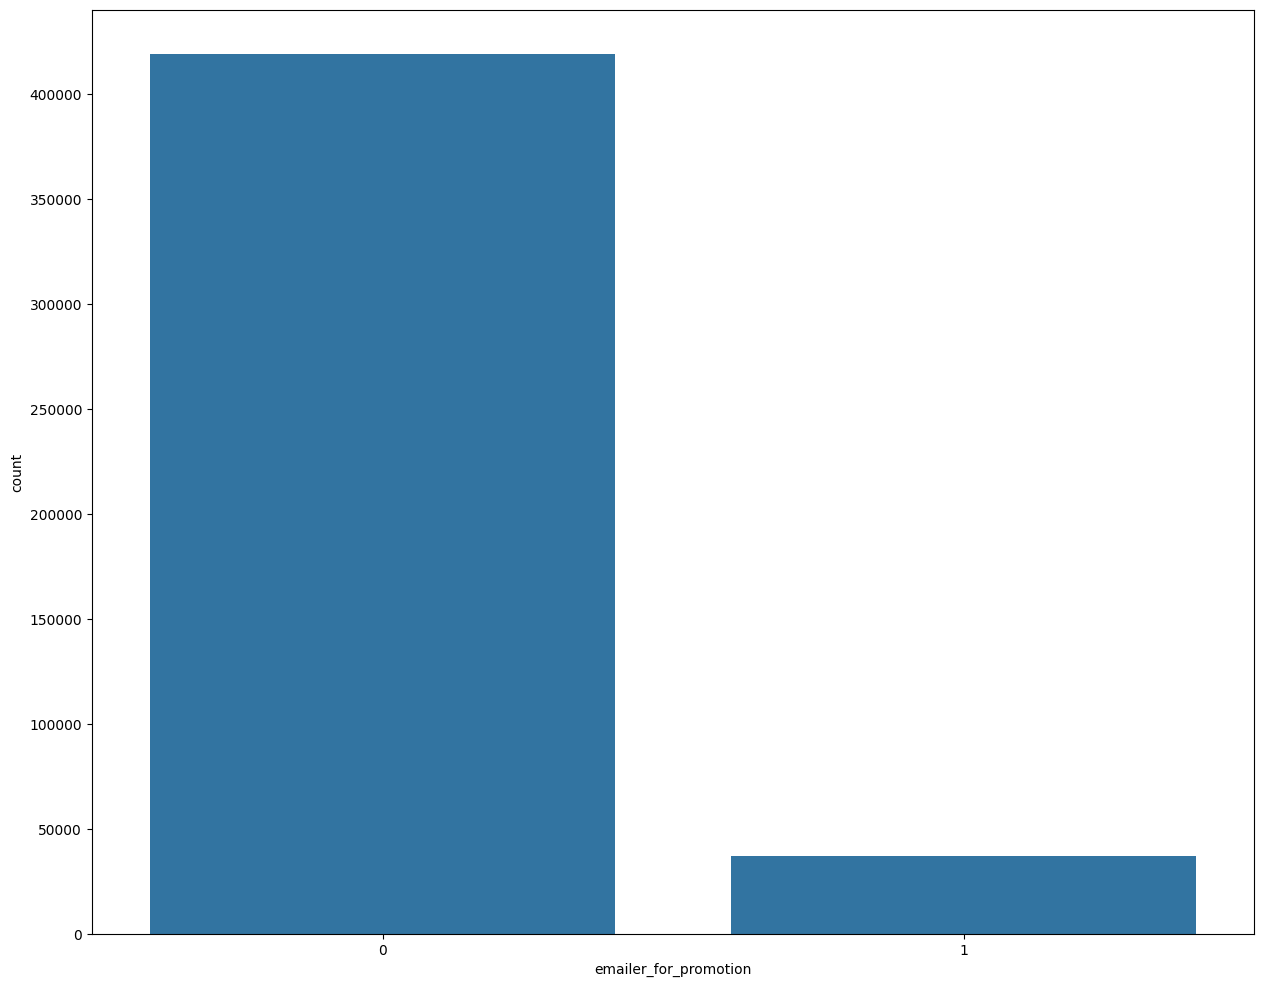

   homepage_featured      Ratio
0                  0  89.080009
1                  1  10.919991



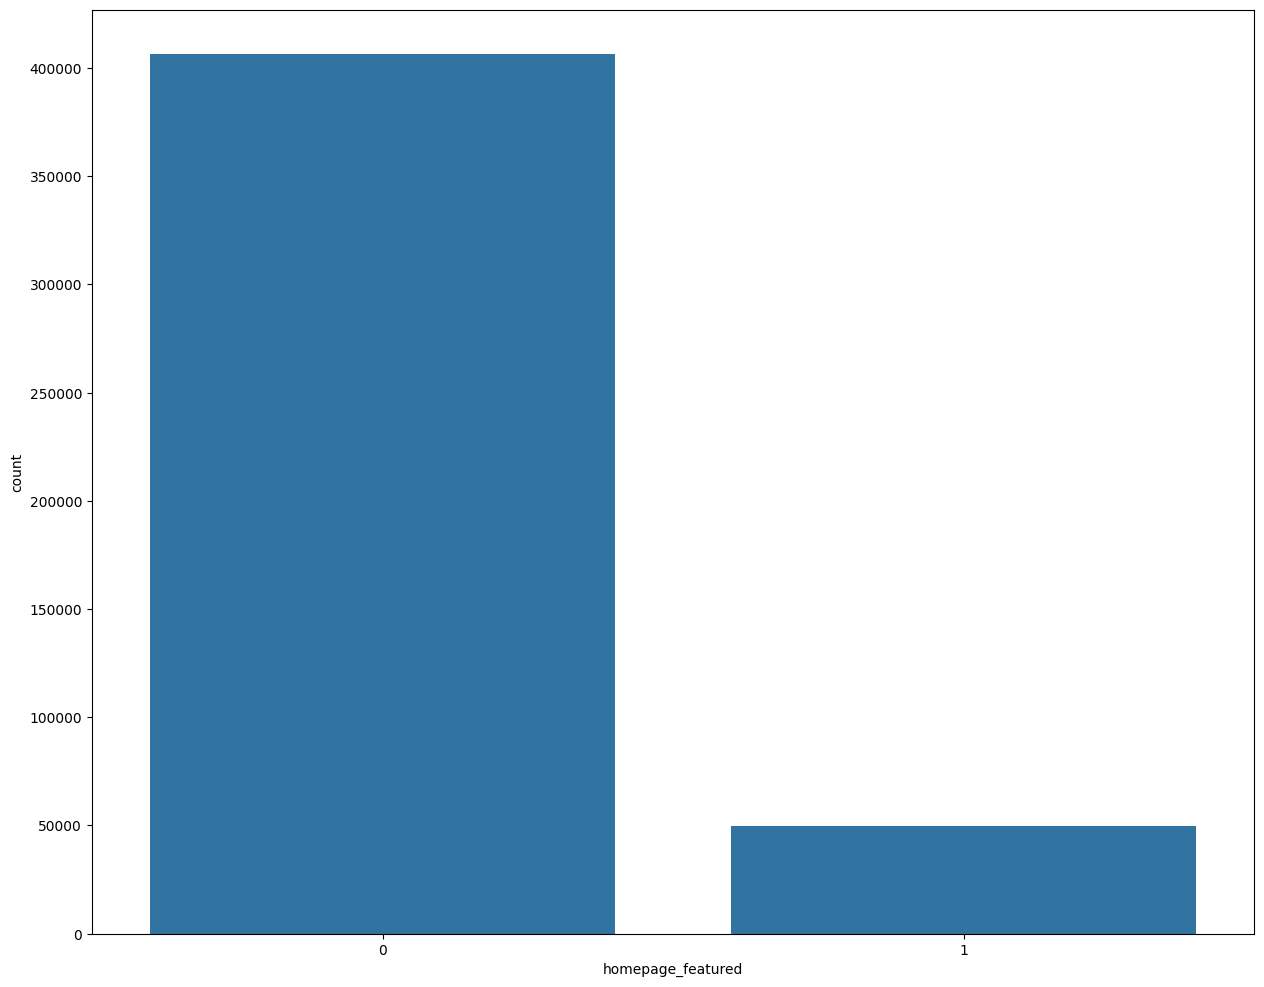

   region_code      Ratio
0           56  41.885629
1           34  25.564234
2           77  20.723341
3           85   6.633037
4           23   1.409271
5           71   1.378387
6           93   1.253099
7           35   1.153000



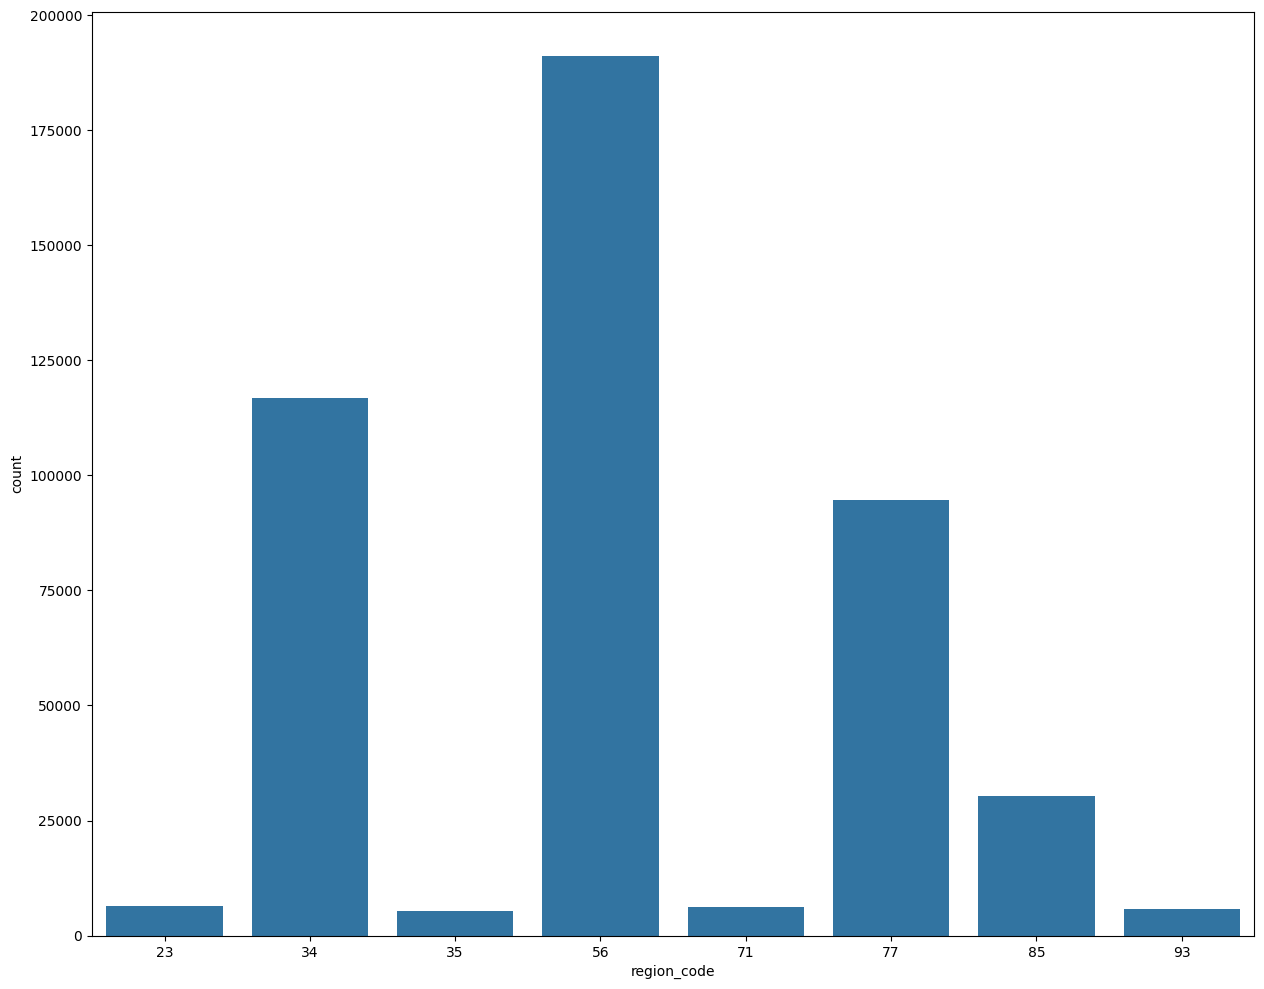

In [108]:
for col in cat_cols:
    cat_summary(df,col,plot=True)


In [109]:
def num_summary(df,col_name,plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[col_name].describe(quantiles).T)

    if plot:
        plt.figure(figsize=(15,12))
        sns.kdeplot(df[col_name],bw_adjust=1,fill=True)
        plt.xlabel(col_name)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

count    4.565480e+05
mean     1.250096e+06
std      1.443548e+05
min      1.000000e+06
5%       1.025009e+06
10%      1.049949e+06
20%      1.100019e+06
30%      1.150087e+06
40%      1.200186e+06
50%      1.250184e+06
60%      1.300142e+06
70%      1.350208e+06
80%      1.400051e+06
90%      1.450094e+06
95%      1.475046e+06
99%      1.495002e+06
max      1.499999e+06
Name: id, dtype: float64


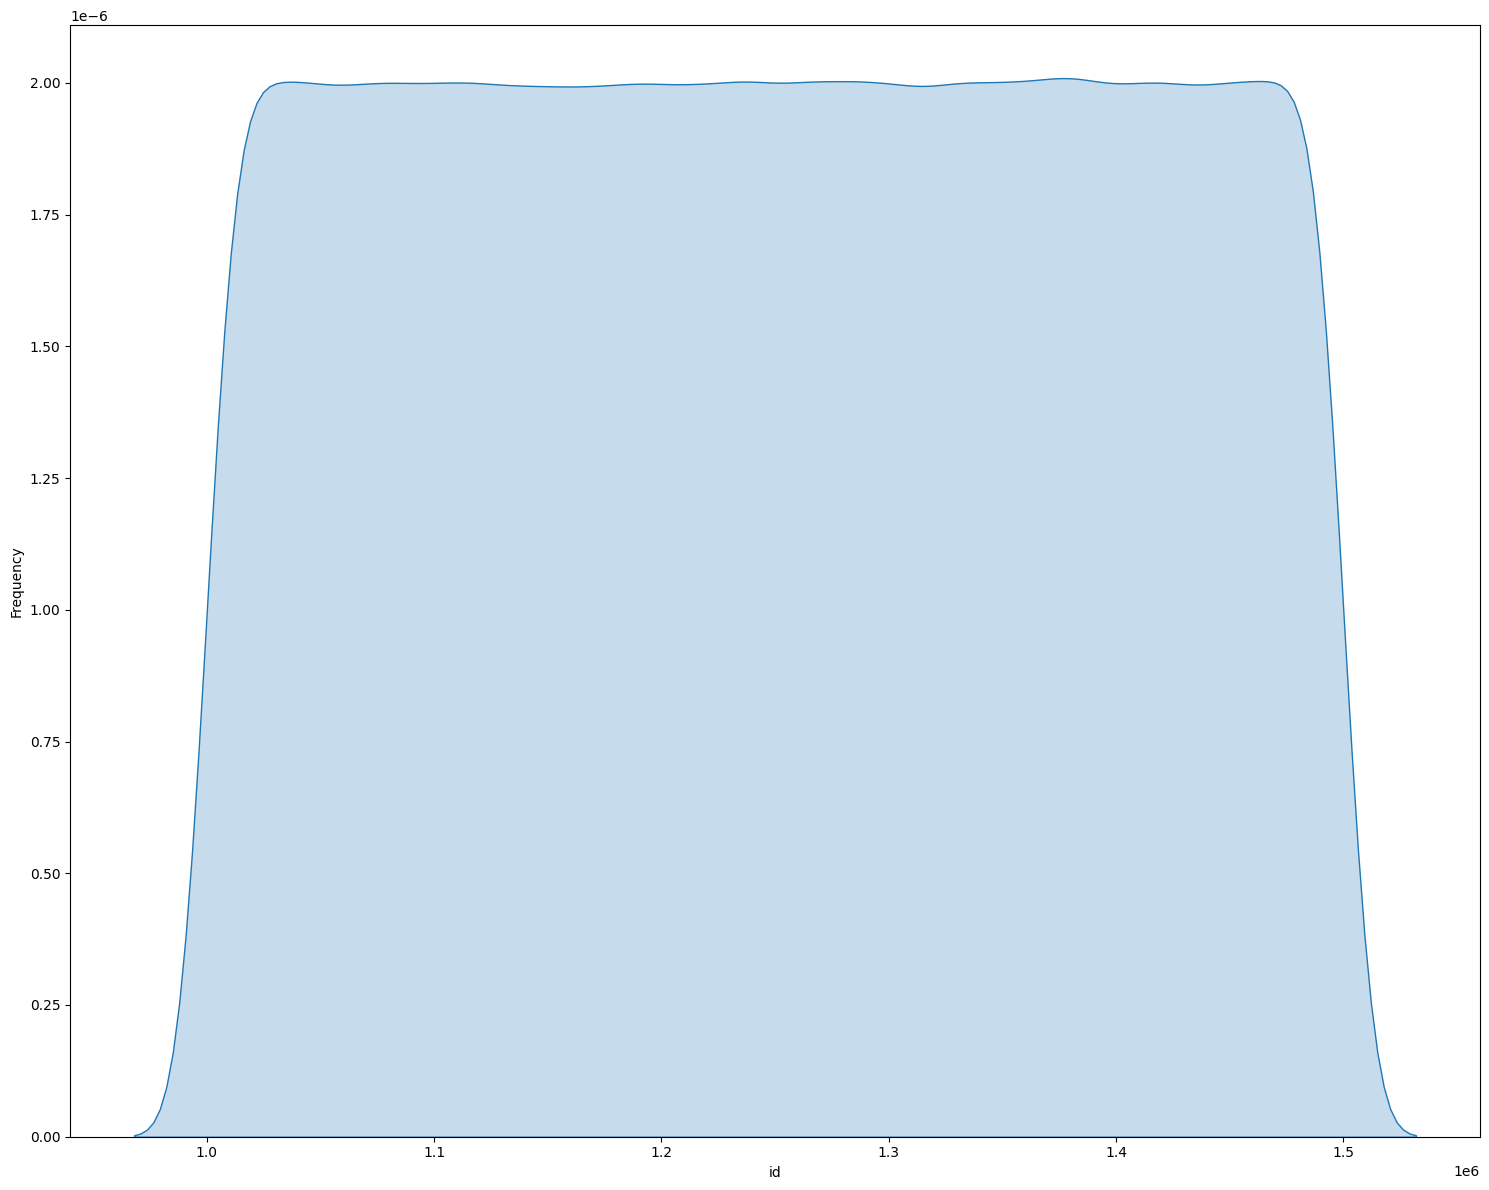

count    456548.000000
mean         74.768771
std          41.524956
min           1.000000
5%            8.000000
10%          16.000000
20%          32.000000
30%          47.000000
40%          61.000000
50%          76.000000
60%          90.000000
70%         104.000000
80%         118.000000
90%         132.000000
95%         139.000000
99%         144.000000
max         145.000000
Name: week, dtype: float64


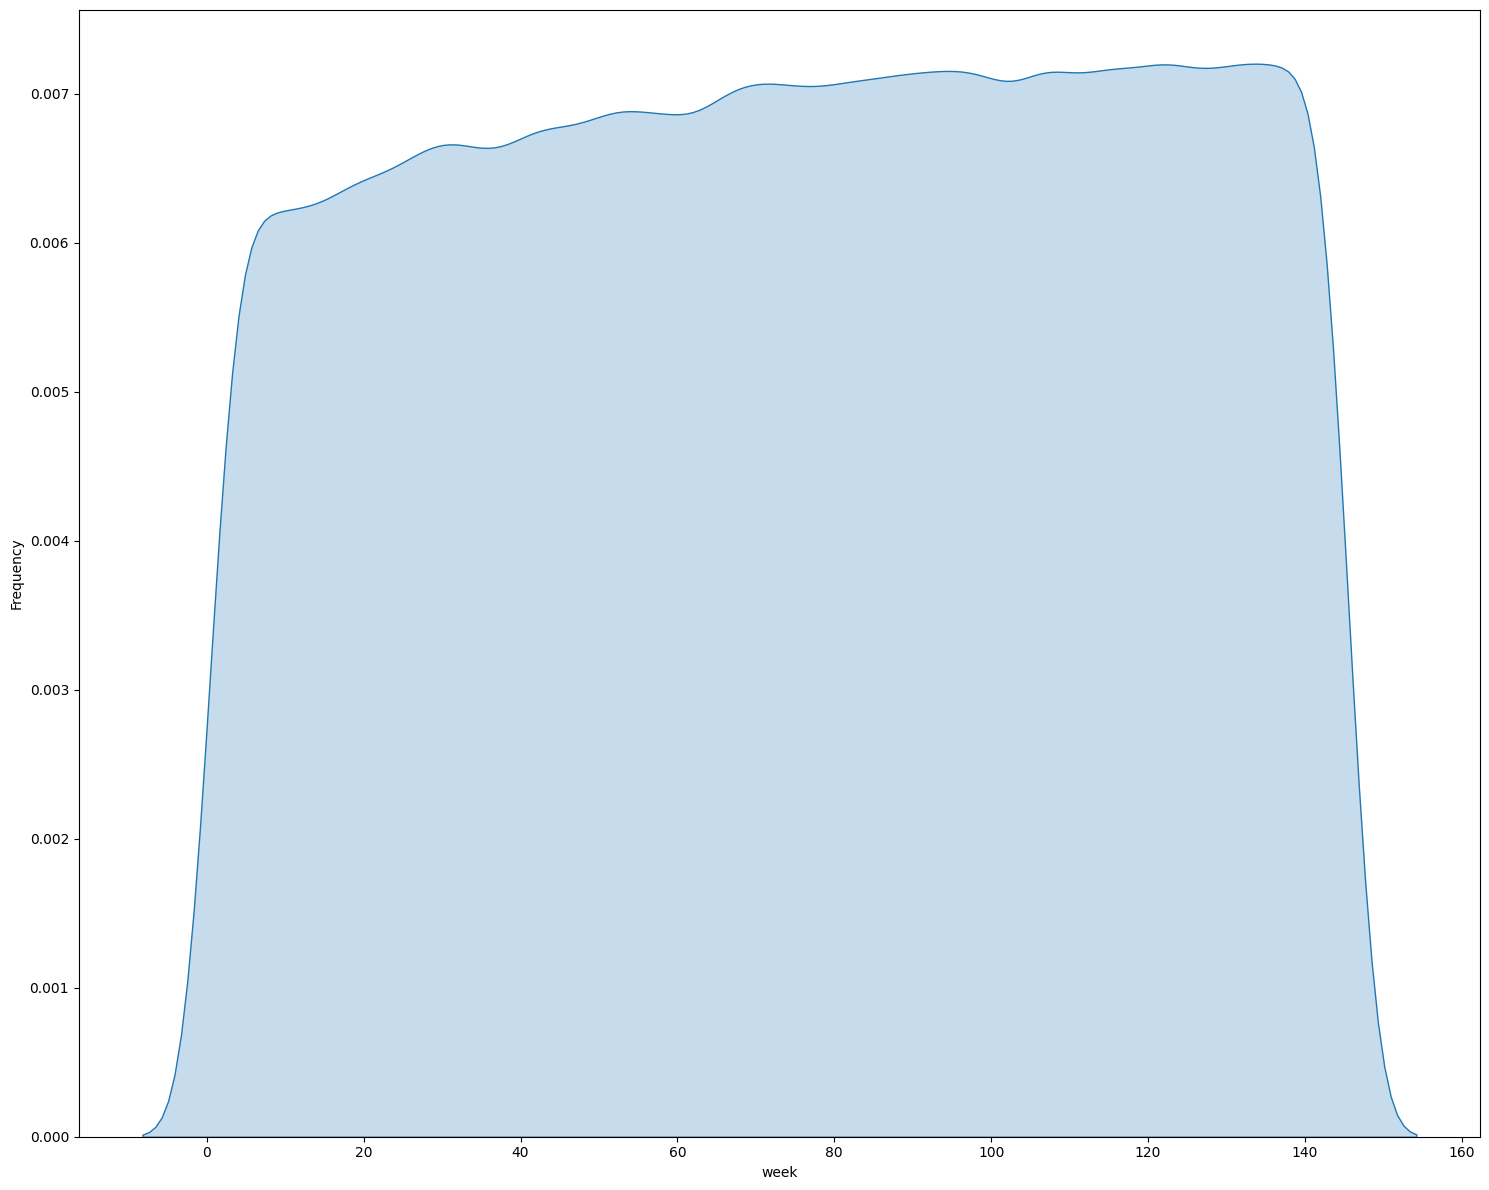

count    456548.000000
mean         82.105796
std          45.975046
min          10.000000
5%           14.000000
10%          23.000000
20%          36.000000
30%          53.000000
40%          66.000000
50%          76.000000
60%          91.000000
70%         104.000000
80%         129.000000
90%         152.000000
95%         161.000000
99%         186.000000
max         186.000000
Name: center_id, dtype: float64


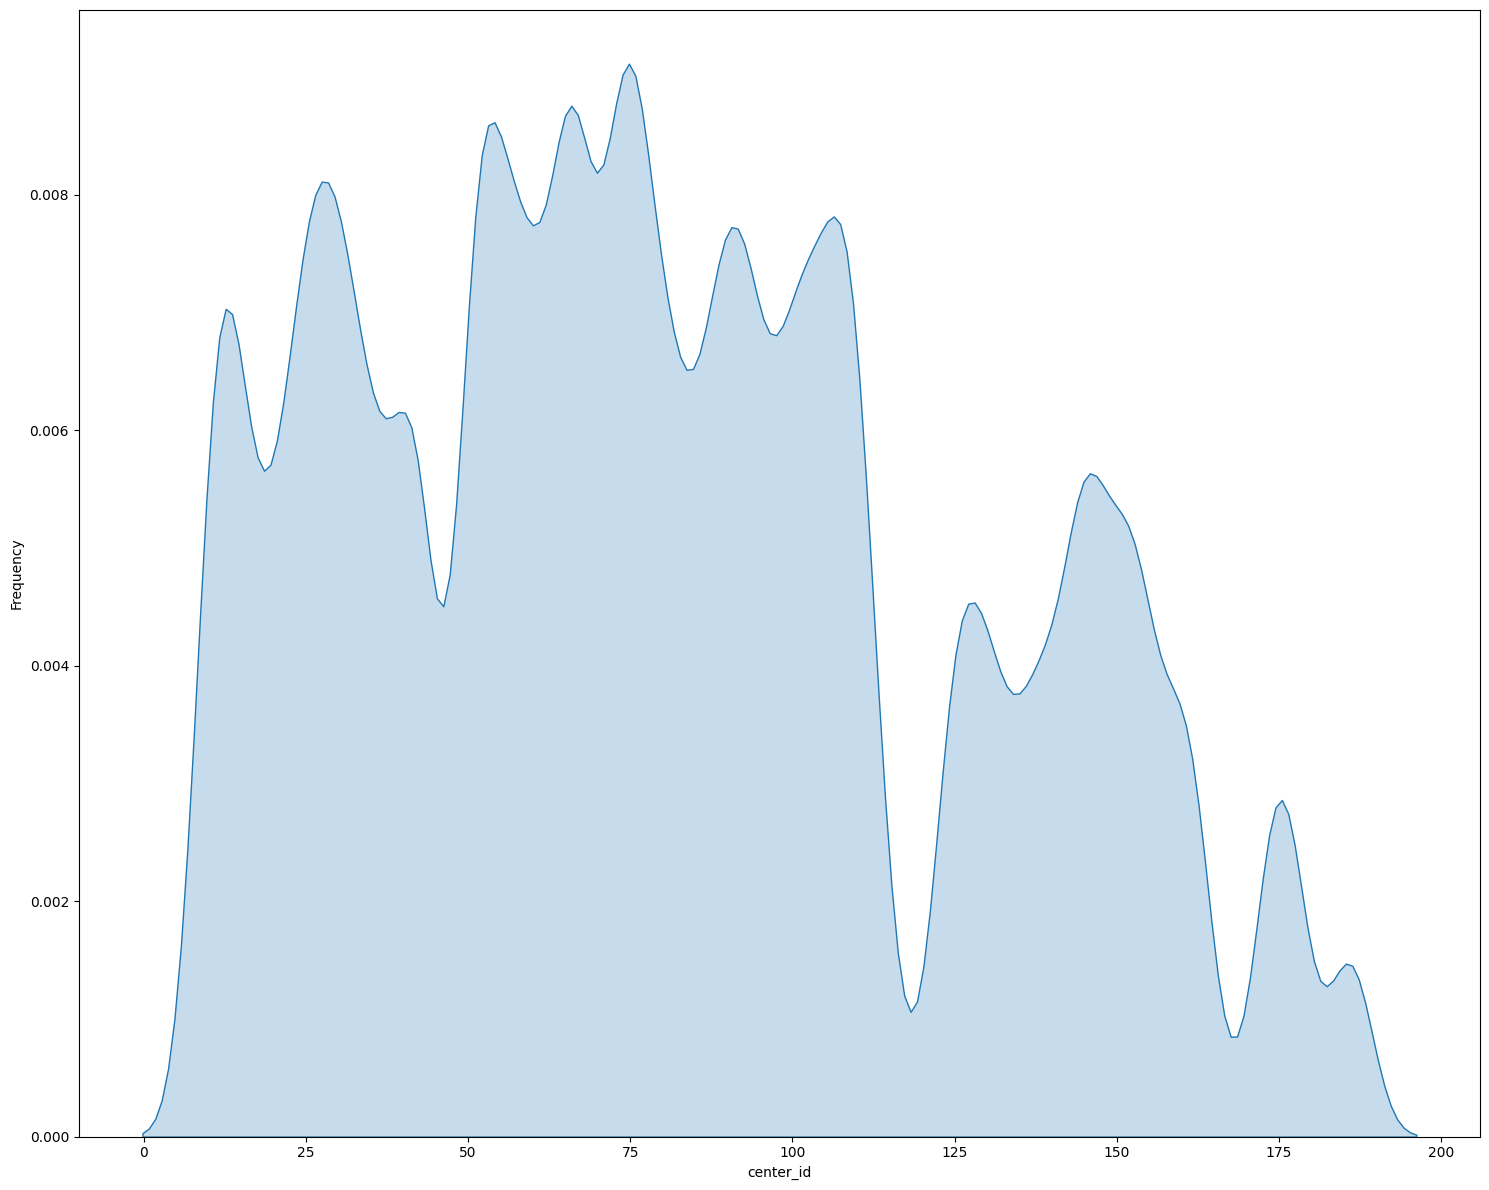

count    456548.000000
mean       2024.337458
std         547.420920
min        1062.000000
5%         1198.000000
10%        1216.000000
20%        1445.000000
30%        1727.000000
40%        1878.000000
50%        1993.000000
60%        2304.000000
70%        2492.000000
80%        2581.000000
90%        2704.000000
95%        2760.000000
99%        2867.000000
max        2956.000000
Name: meal_id, dtype: float64


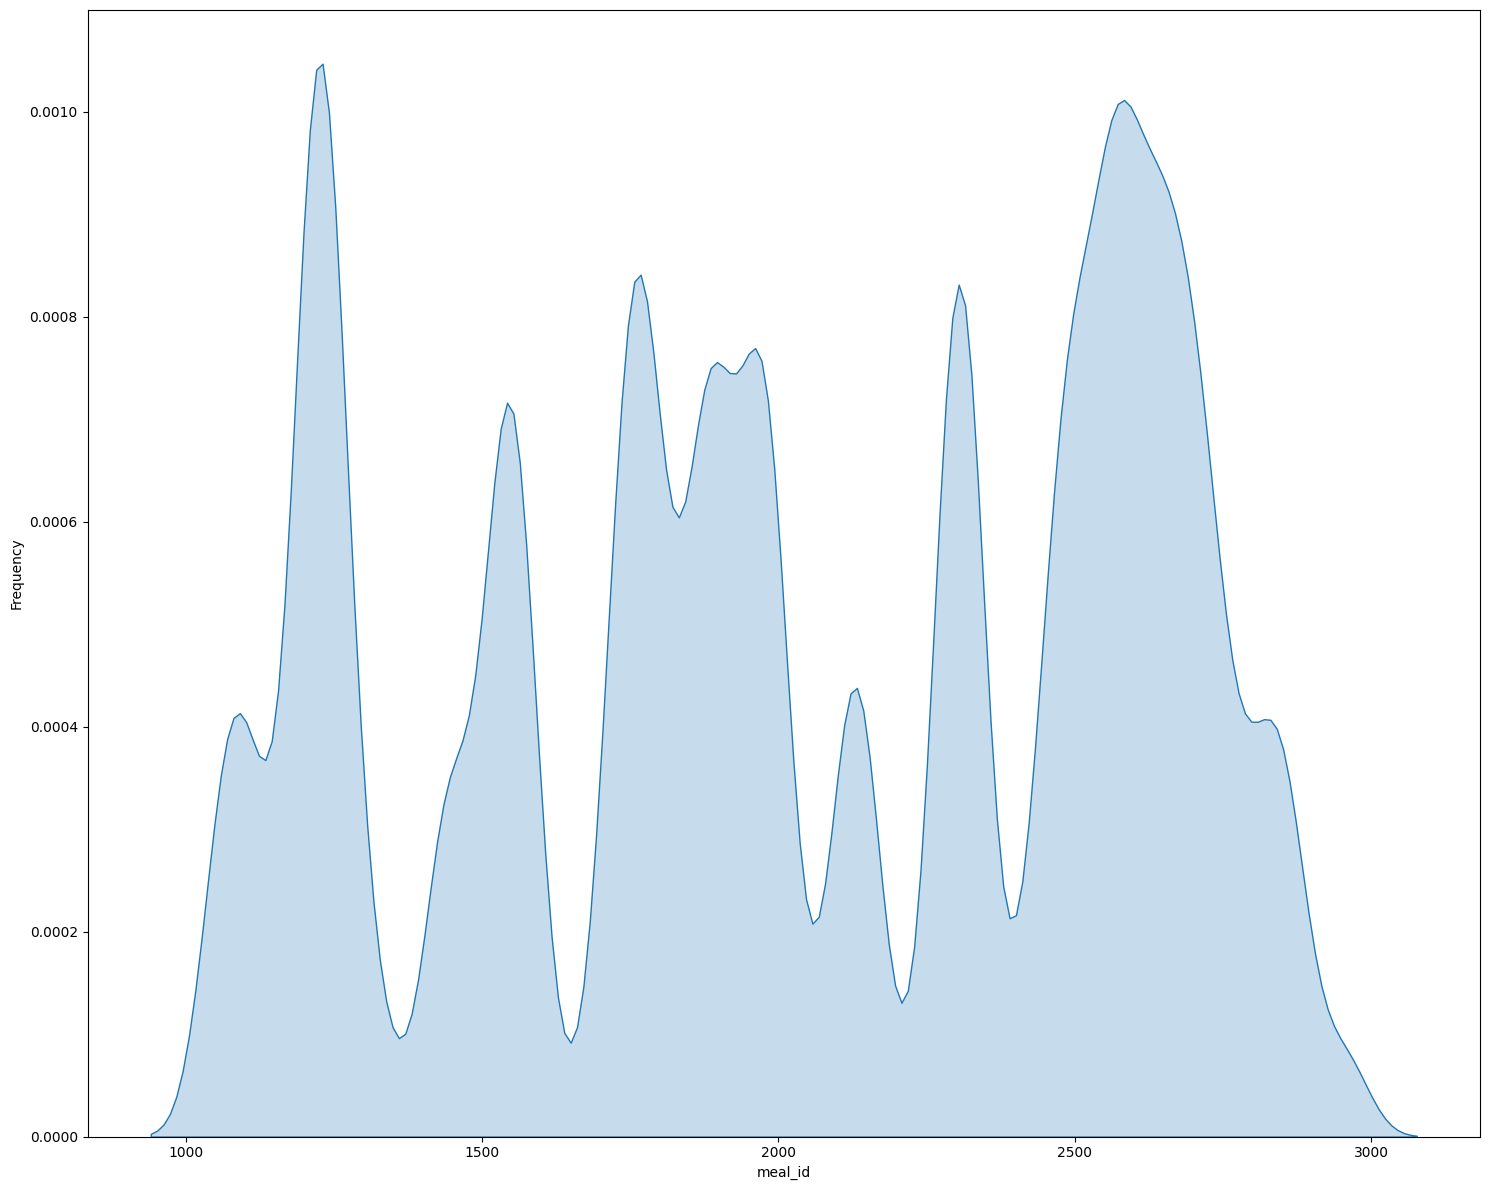

count    456548.000000
mean        332.238721
std         152.939051
min           2.970000
5%          121.280000
10%         151.380000
20%         192.090000
30%         243.500000
40%         281.330000
50%         296.820000
60%         323.070000
70%         402.550000
80%         466.630000
90%         581.030000
95%         640.230000
99%         708.130000
max         769.650000
Name: checkout_price, dtype: float64


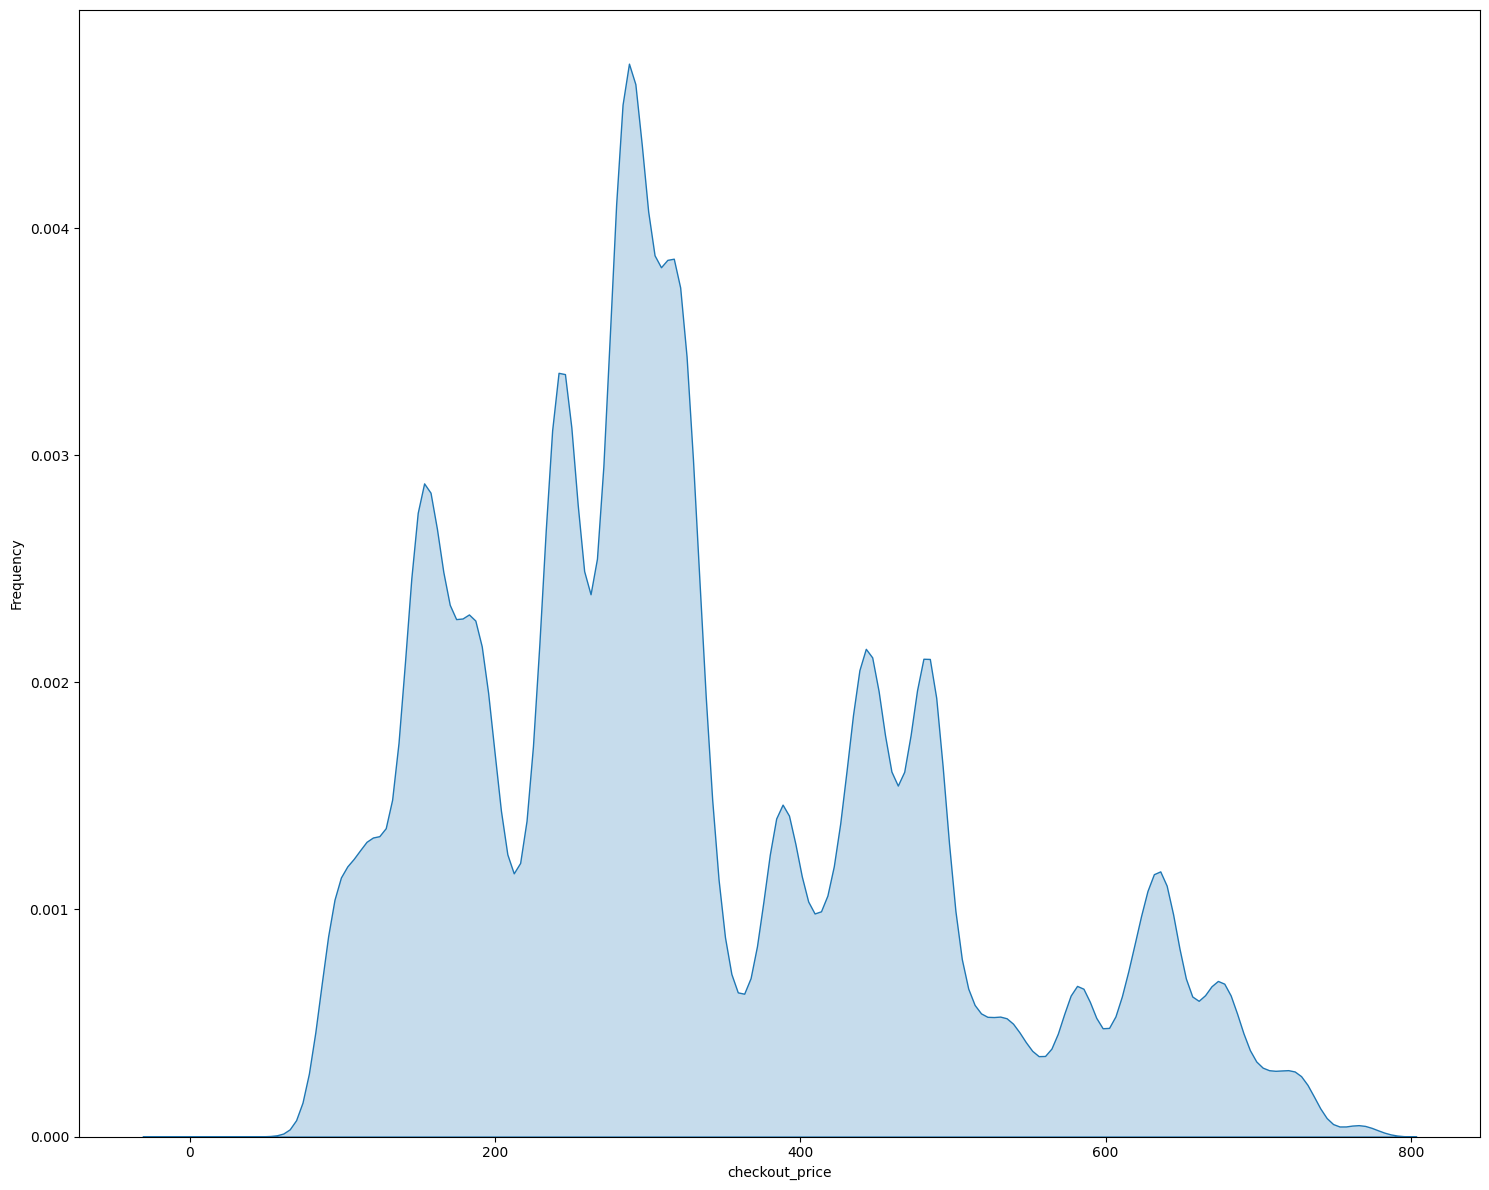

count    456548.000000
mean        354.155163
std         160.711634
min          55.350000
5%          144.530000
10%         155.260000
20%         222.190000
30%         270.630000
40%         290.030000
50%         310.460000
60%         329.860000
70%         438.497000
80%         485.030000
90%         630.530000
95%         668.330000
99%         726.530000
max         781.925000
Name: base_price, dtype: float64


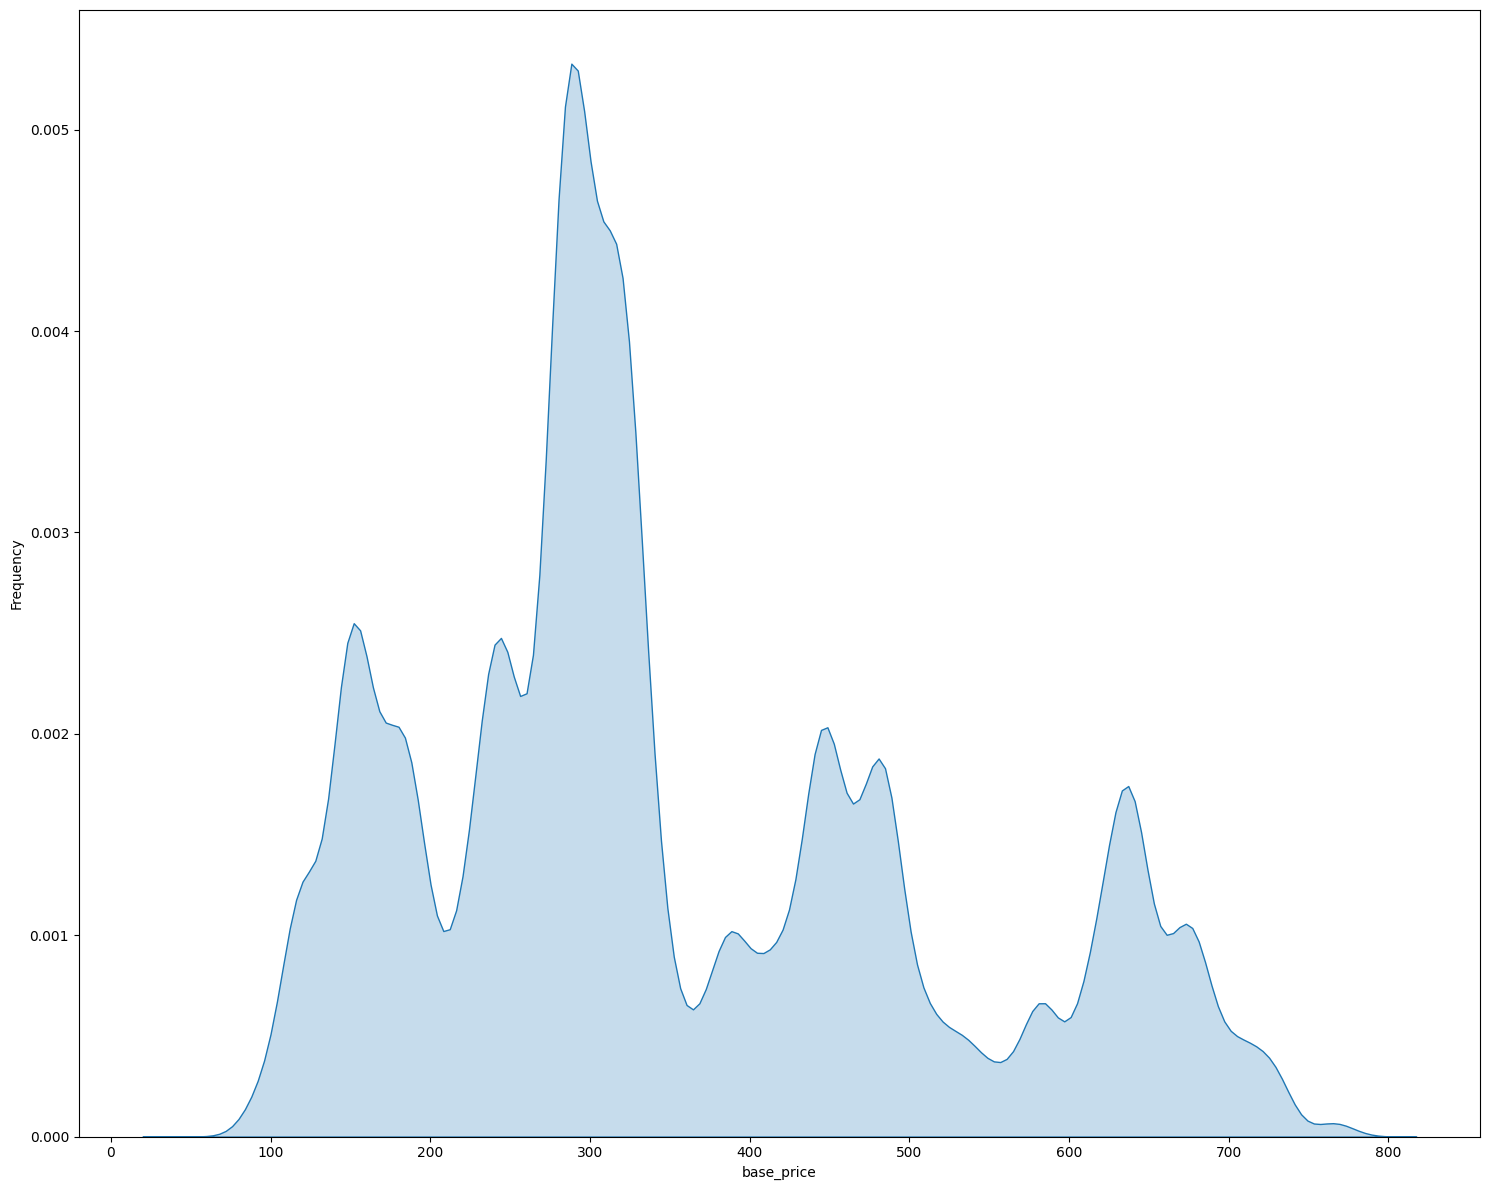

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
5%           14.000000
10%          26.000000
20%          41.000000
30%          68.000000
40%          95.000000
50%         136.000000
60%         190.000000
70%         270.000000
80%         391.000000
90%         609.000000
95%         878.000000
99%        1796.000000
max       24299.000000
Name: num_orders, dtype: float64


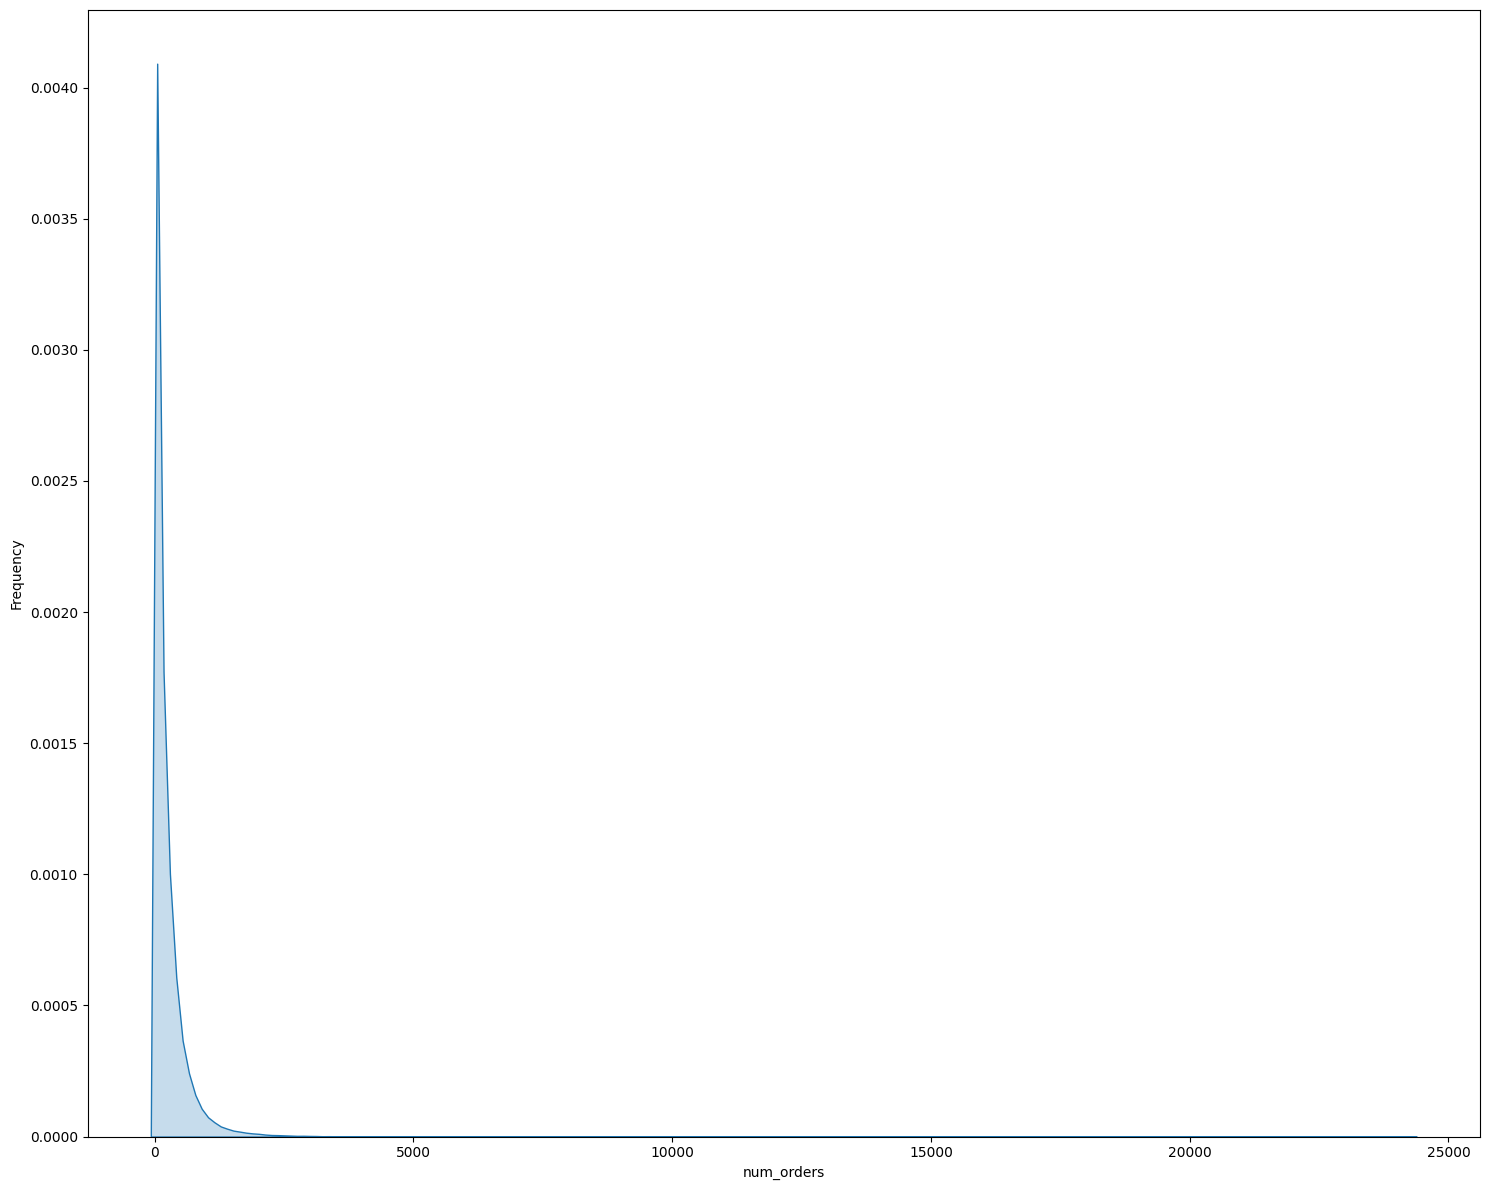

count    456548.000000
mean        601.553399
std          66.195914
min         456.000000
5%          478.000000
10%         517.000000
20%         526.000000
30%         576.000000
40%         590.000000
50%         596.000000
60%         615.000000
70%         647.000000
80%         675.000000
90%         695.000000
95%         700.000000
99%         713.000000
max         713.000000
Name: city_code, dtype: float64


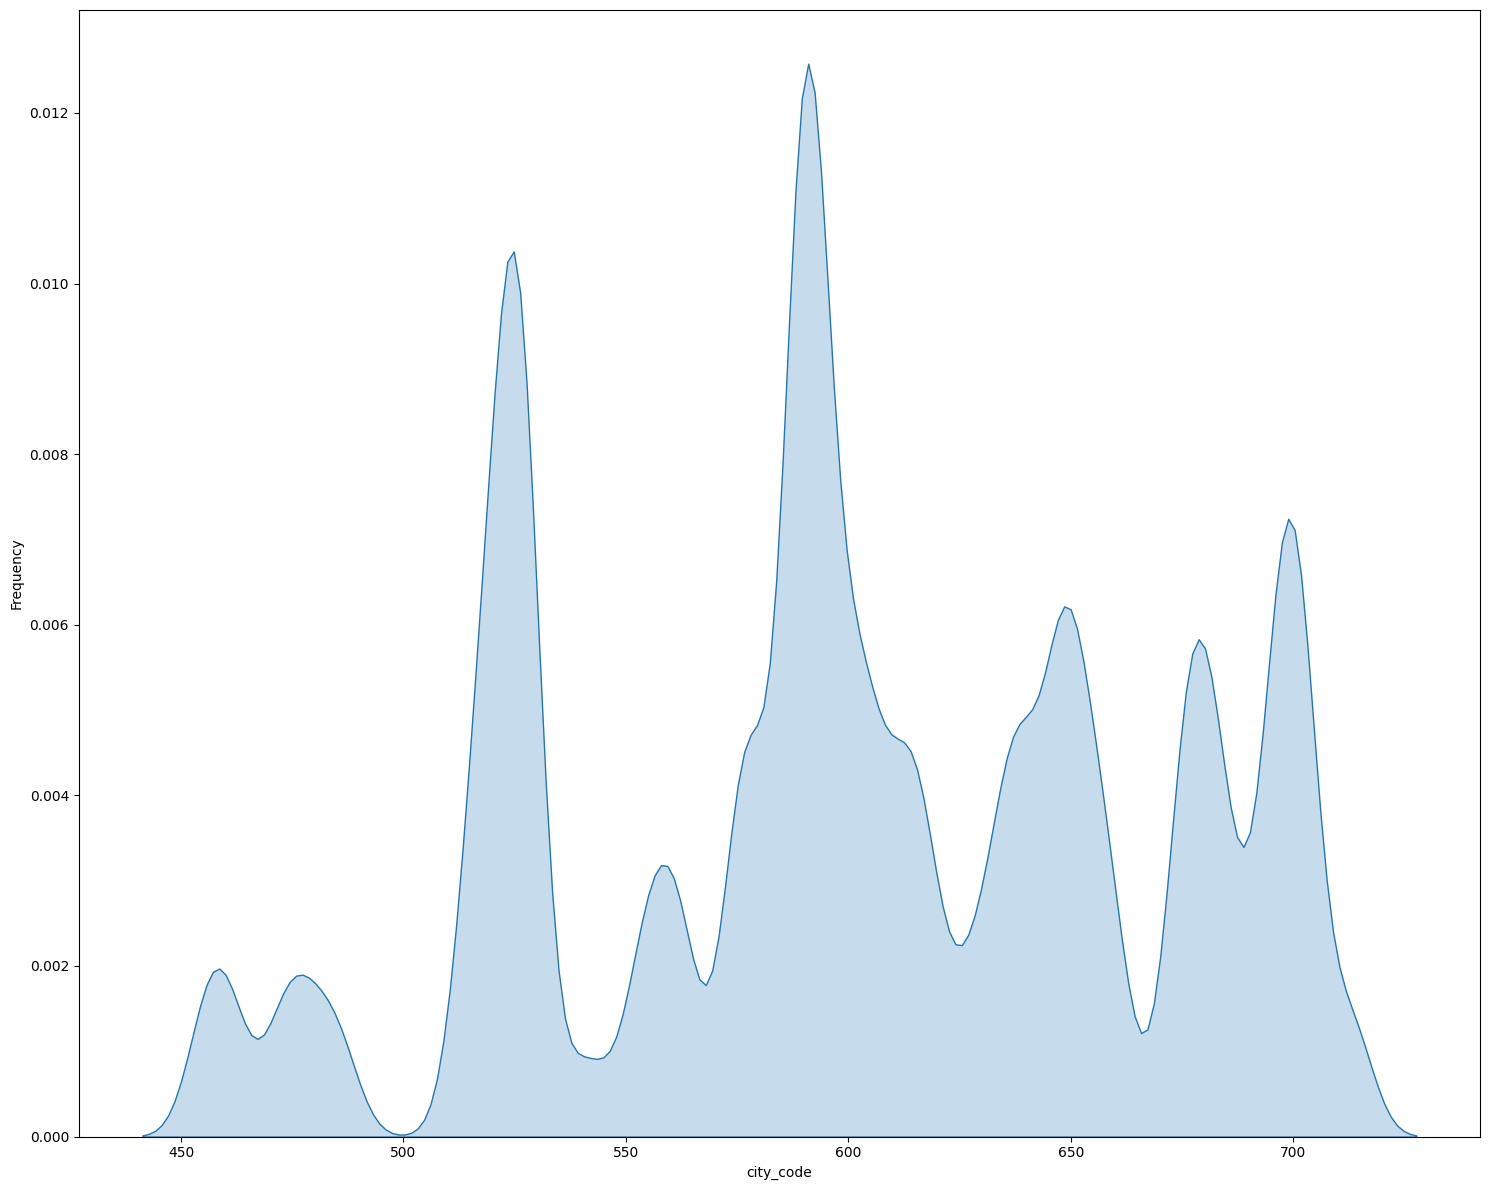

count    456548.000000
mean          4.029938
std           0.880891
min           2.250000
5%            2.700000
10%           2.800000
20%           3.400000
30%           3.800000
40%           3.900000
50%           4.000000
60%           4.100000
70%           4.400000
80%           4.700000
90%           5.300000
95%           5.850000
99%           5.850000
max           5.850000
Name: op_area, dtype: float64


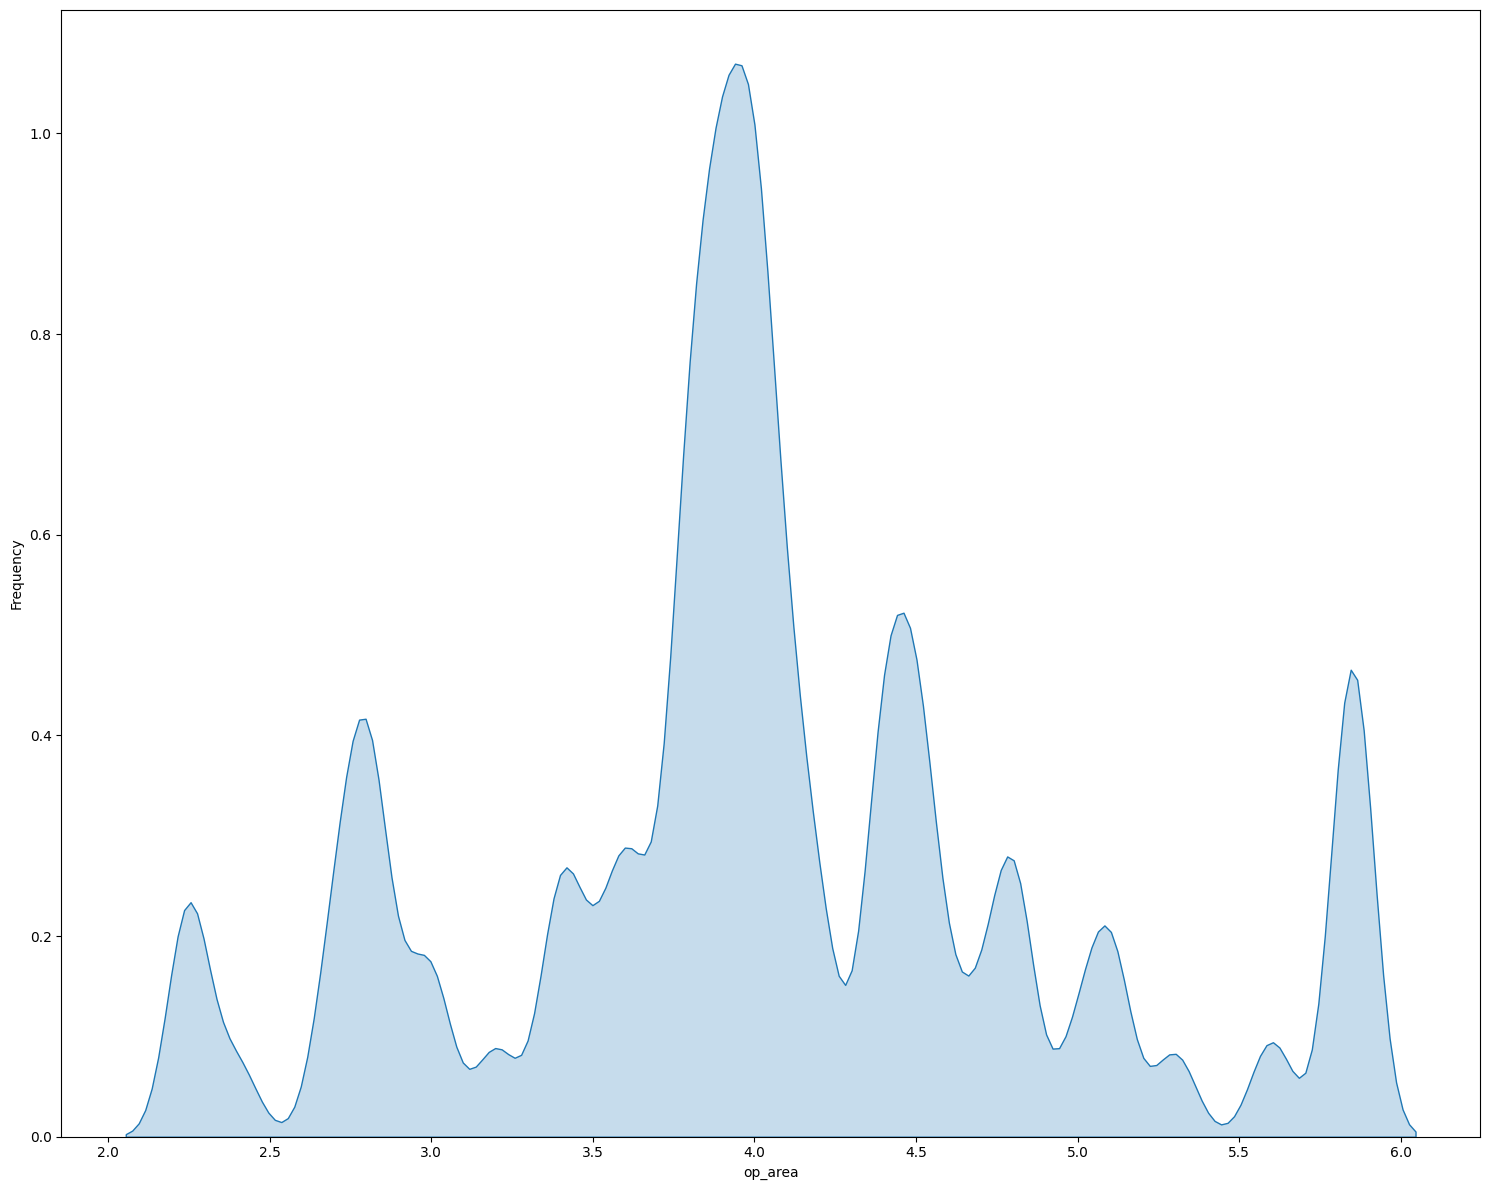

In [110]:
for col in num_cols:
    num_summary(df,col,plot=True)


In [57]:
def target_summary_with_num(df,target,col_name):
    print(df.groupby(target).aggregate({col_name: "mean"}),end="\n\n\n")

def target_summary_with_cat(df,target,col_name):
    print(pd.DataFrame({"Target_Mean":df.groupby(col_name)[target].mean()}),end="\n\n\n")


In [55]:
for col in num_cols:
    if col != "num_orders":
        target_summary_with_num(df,"num_orders",col)

                      id
num_orders              
13          1.250155e+06
14          1.250991e+06
15          1.250817e+06
26          1.250261e+06
27          1.250086e+06
...                  ...
13150       1.346216e+06
13580       1.470267e+06
14229       1.087163e+06
15336       1.300512e+06
24299       1.452474e+06

[1250 rows x 1 columns]


                  week
num_orders            
13           74.559813
14           74.047840
15           74.282414
26           74.328009
27           73.991537
...                ...
13150       132.000000
13580         5.000000
14229         6.000000
15336         7.000000
24299         5.000000

[1250 rows x 1 columns]


            center_id
num_orders           
13          85.228442
14          85.214670
15          85.410688
26          84.440866
27          85.273251
...               ...
13150       43.000000
13580       10.000000
14229       43.000000
15336       43.000000
24299       43.000000

[1250 rows x 1 columns]


         

In [58]:
for col in cat_cols:
    target_summary_with_cat(df,"num_orders",col)

              Target_Mean
category                 
Beverages      316.526116
Biryani         30.651402
Desert          66.250905
Extras         293.834169
Fish            85.595268
Other Snacks   162.234691
Pasta           59.137142
Pizza          222.817309
Rice Bowl      624.822288
Salad          383.218460
Sandwich       529.776276
Seafood        100.895898
Soup            82.023353
Starters       155.276110


             Target_Mean
cuisine                 
Continental   164.545348
Indian        229.039037
Italian       359.347830
Thai          276.423411


             Target_Mean
center_type             
TYPE_A        262.394456
TYPE_B        318.856145
TYPE_C        206.670097


                       Target_Mean
emailer_for_promotion             
0                       229.262883
1                       631.097544


                   Target_Mean
homepage_featured             
0                   221.050040
1                   594.884786


             Target_Mean
region_cod

### Data Pre-Processing

In [78]:
def outlier_threshold(df,col_name,Q1=0.25,Q2=0.75):
    q1 = df[col_name].quantile(Q1)
    q3 = df[col_name].quantile(Q2)

    iqr = q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    return lower_limit,upper_limit

def check_outlier(df,col_name):
    low,up = outlier_threshold(df,col_name)

    # does there any outlier exists
    if df[(df[col_name] > up) | (df[col_name] < low)].any(axis=None):
        return True
    return False

def replace_with_threshold(df,col_name):
    low,up = outlier_threshold(df,col_name)

    df.loc[(df[col_name] < low,col_name)] = low
    df.loc[(df[col_name] > up,col_name)] = up


In [75]:
# df[df['base_price']>1000].any(axis=None)
df.loc[(df['base_price']<100,"id")]

359       1433463
1052      1209505
1239      1282983
1240      1368550
1241      1306419
           ...   
439022    1168586
442313    1288740
442314    1267391
445563    1141000
445564    1228305
Name: id, Length: 2532, dtype: int64

In [80]:
for col in num_cols:
    if col != "num_orders":
        print(f'{col}: ',check_outlier(df,col))
        
for col in num_cols:
    if col != "num_orders":
        replace_with_threshold(df,col)


id:  False
week:  False
center_id:  False
meal_id:  False
checkout_price:  False
base_price:  False
city_code:  False
op_area:  False


In [88]:
def missing_values(df,na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = np.round((df[na_columns].isnull().sum()/df.shape[0] * 100).sort_values(ascending=False),2)

    missing_df = pd.concat([n_miss,ratio],axis=1,keys=['n_miss','ratio'])

    print(missing_df)
    
    if na_name:
        return na_columns

In [89]:
missing_values(df,True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

Now we will group rare categories in categorical columns into a single category labeled as "Rare" if their frequency is below a given threshold.

Why Use This?  
✅ Prevents overfitting → Too many unique categories can cause models to memorize instead of generalizing.  
✅ Improves model performance → Reduces noise by grouping low-frequency categories.  
✅ Better interpretability → Easier to understand trends in the data.  

In [95]:
def rare_encoder(df,rare_percentage):
    temp_df = df.copy()

    rare_cols = [col for col in temp_df.columns if temp_df[col].dtypes == 'O' and (temp_df[col].value_counts()/len(temp_df) < rare_percentage).any(axis=None)]

    for col in rare_cols:
        tmp = temp_df[col].value_counts()/len(temp_df)
        print(tmp)
        rare_labels = tmp[tmp < rare_percentage].index
        print(rare_labels)

        temp_df[col] = np.where(temp_df[col].isin(rare_labels),'Rare',temp_df[col])

    return temp_df

def analyse_categorical_data(df,target,cat_col):
    
    for col in cat_col:
        print(f"{col}: ",len(df[col].value_counts()))
        print(pd.DataFrame({
            "COUNT": df[col].value_counts(),
            "RATIO": df[col].value_counts()/len(df),
            "MEAN": df.groupby(col)[target].mean()
        }),end = "\n\n\n")


In [96]:
df = rare_encoder(df,0.02)
print((df == "Rare").any().any())

analyse_categorical_data(df,"num_orders",cat_cols)

False
category:  14
               COUNT     RATIO        MEAN
category                                  
Beverages     127890  0.280124  316.526116
Biryani        20614  0.045152   30.651402
Desert         29294  0.064164   66.250905
Extras         13562  0.029706  293.834169
Fish           10187  0.022313   85.595268
Other Snacks   29379  0.064350  162.234691
Pasta          27694  0.060660   59.137142
Pizza          33138  0.072584  222.817309
Rice Bowl      33408  0.073175  624.822288
Salad          28559  0.062554  383.218460
Sandwich       33291  0.072919  529.776276
Seafood        26916  0.058955  100.895898
Soup           12675  0.027763   82.023353
Starters       29941  0.065581  155.276110


cuisine:  4
              COUNT     RATIO        MEAN
cuisine                                  
Continental  102795  0.225157  164.545348
Indian       112612  0.246660  229.039037
Italian      122925  0.269249  359.347830
Thai         118216  0.258934  276.423411


center_type:  3
        

In [112]:
# correlation matrix

def correlation_matrix(df,cols):
    fig = plt.gcf()
    fig.set_size_inches(10,8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

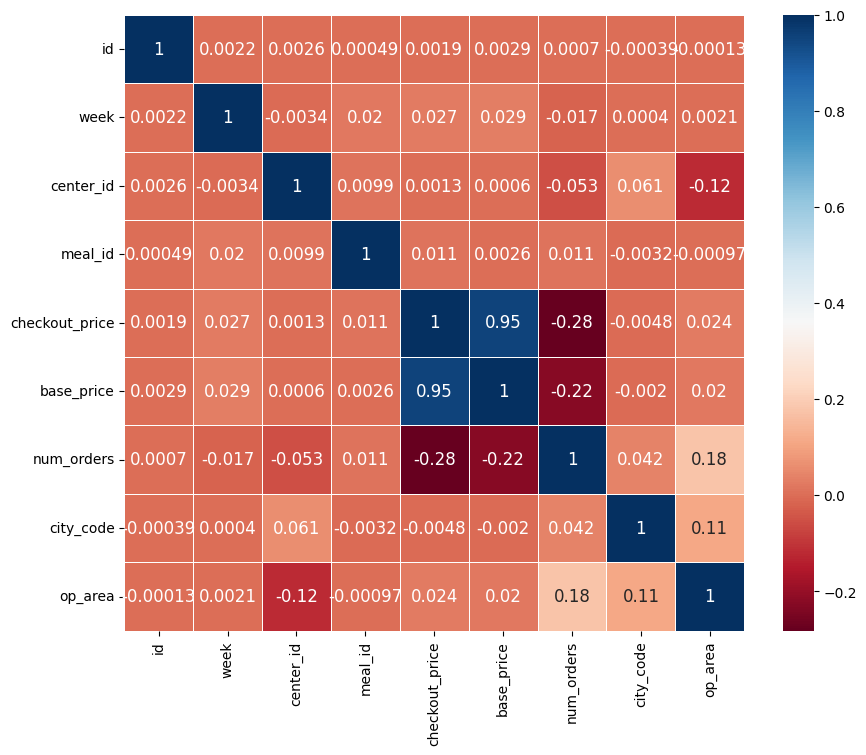

In [114]:
correlation_matrix(df,num_cols)

### Feature Engineering

In [111]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560.0,1,55.0,1885.0,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.25
1,1466964.0,1,55.0,1993.0,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.25
2,1346989.0,1,55.0,2539.0,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.25
3,1338232.0,1,55.0,2139.0,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.25
4,1448490.0,1,55.0,2631.0,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.25


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  float64
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  float64
 3   meal_id                456548 non-null  float64
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

### Interaction Feature

- Combine city_code and region_code into one.
- Combine Region + Cusisine.

Reasons to add these features ? 

- Capturing Non-Linear Relationships
    - The model may learn different patterns for cuisines based on region.
        E.g., Indian cuisine in Region 56 might behave differently than in Region 23 in terms of sales, demand, or preferences.
        By merging them, the model can capture these region-specific cuisine effects.

- Allowing Tree-Based Models to Split on This Feature
    - Decision trees (like Random Forest, XGBoost) split on individual features.
    - Having region_cuisine allows models to split on region-specific cuisines directly, which might improve predictive power.

In [117]:
df['city_region'] = df['city_code'].astype(str) + '_' + df['region_code'].astype(str)
df['region_cuisine'] = df['region_code'].astype(str) + '_' + df['cuisine']

### Week Cyclic Transformation

Why Do We Use Sine and Cosine?  

1. Preserving Cyclic Nature  
    - week = 1 and week = 52 should be close in numerical representation.  
    - Normalizing weeks as continuous values (1 to 52) makes the model think week 1 and week 52 are far apart, which isn't true.  
    - Sin-Cos encoding ensures cyclicity, where: week = 1 and week = 52 have similar values, week = 13 (quarter year) and week = 39      (three-quarter year) have opposite values.  

2. Helps Linear Models and Distance-Based Models  
    - Models like linear regression and k-NN assume distance is meaningful.
    - If you keep week as a numeric feature, the model might think week 1 and 52 are far apart.
    - Using sin and cos transformations ensures the model understands the cyclic pattern.

In [118]:
df['week_sin'] = np.sin(2*np.pi*df['week']/52.143)
df['week_cos'] = np.cos(2*np.pi*df['week']/52.143)


In [122]:
df.drop(['id','week'],axis=1,inplace=True)
df.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,city_region,region_cuisine,week_sin,week_cos
0,55.0,1885.0,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.25,647_56,56_Thai,0.120208,0.992749
1,55.0,1993.0,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.25,647_56,56_Thai,0.120208,0.992749
2,55.0,2539.0,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.25,647_56,56_Thai,0.120208,0.992749
3,55.0,2139.0,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.25,647_56,56_Indian,0.120208,0.992749
4,55.0,2631.0,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.25,647_56,56_Indian,0.120208,0.992749


In [124]:
df['discount_per'] = (df['base_price'] - df['checkout_price'])/df['base_price']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   center_id              456548 non-null  float64
 1   meal_id                456548 non-null  float64
 2   checkout_price         456548 non-null  float64
 3   base_price             456548 non-null  float64
 4   emailer_for_promotion  456548 non-null  int64  
 5   homepage_featured      456548 non-null  int64  
 6   num_orders             456548 non-null  int64  
 7   category               456548 non-null  object 
 8   cuisine                456548 non-null  object 
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  city_region            456548 non-null  object 
 14  region_cuisine         456548 non-nu

In [128]:
print(df['emailer_for_promotion'].value_counts())
print(df['homepage_featured'].value_counts())
print(df['emailer_for_promotion'].corr(df['num_orders']))
print(df['homepage_featured'].corr(df['num_orders']))
df['emailer_for_promotion'].corr(df['homepage_featured'])

emailer_for_promotion
0    419498
1     37050
Name: count, dtype: int64
homepage_featured
0    406693
1     49855
Name: count, dtype: int64
0.27714686431011565
0.29449023206866076


np.float64(0.3905337565807808)

Weights to be assigned

In [ ]:
# lets combine them into one and check
df['promoted'] = df['emailer_for_promotion'] + df['homepage_featured']

In [131]:
cat_cols, num_cols, cat_but_car = grab_col_names(df,cat_thresh=5,cat_car_thresh=20)

print("Categorical columns: ")
print(cat_cols)
print()
print("Numerical Columns: ")
print(num_cols)
print()
print("Categorical Columns with high cardinality")
print(cat_but_car)

Categorical columns: 
['category', 'cuisine', 'center_type', 'emailer_for_promotion', 'homepage_featured', 'promoted']

Numerical Columns: 
['center_id', 'meal_id', 'checkout_price', 'base_price', 'num_orders', 'city_code', 'region_code', 'op_area', 'week_sin', 'week_cos', 'discount_per']

Categorical Columns with high cardinality
['city_region', 'region_cuisine']


### Applying log on num_orders

- Reduces Skewness:
    - Many real-world datasets have right-skewed distributions, meaning they have a long tail.
    - Taking the log1p() (logarithm of x + 1) compresses large values and spreads smaller values, making the distribution more normal (Gaussian-like).
    - This normalization helps models that assume normally distributed errors (like linear regression) perform better.
    
- Stabilizes Variance (Homoscedasticity):
    - If the variance of num_orders increases as its value increases, the model can struggle.
    - The log transformation stabilizes variance, leading to better generalization.

- Reduces the Impact of Outliers
    - Since the log function flattens large values, extreme outliers in num_orders have less influence on the model.

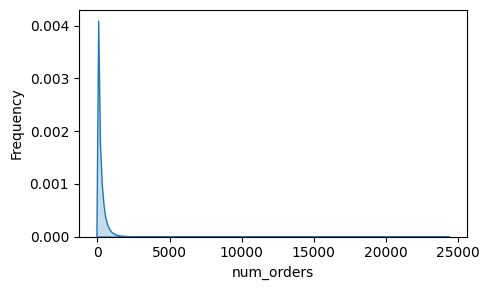

In [137]:
plt.figure(figsize=(5,3))
sns.kdeplot(df['num_orders'],bw_adjust=1,fill=True)
plt.xlabel("num_orders")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

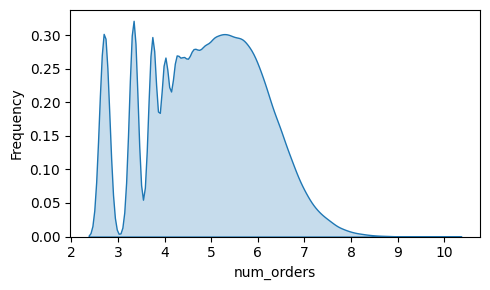

In [138]:
df['num_orders'] = np.log1p(df['num_orders'])

plt.figure(figsize=(5,3))
sns.kdeplot(df['num_orders'],bw_adjust=1,fill=True)
plt.xlabel("num_orders")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [139]:
df.to_csv('../data/tranformed_train_data.csv',index=False)